In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from matplotlib.ticker import FuncFormatter

### Load data

#### MONAI results data

In [2]:
monai_results = pd.read_csv('results/monai_20_epochs_results_hp.csv')

monai_results

,Epoch,Loss,Accuracy
0,1,194.514136,80.007003
1,2,116.724642,88.935574
2,3,85.026323,91.946779
3,4,66.288278,93.820028
4,5,45.305849,95.920868
5,6,39.142815,96.271008
6,7,28.697174,97.216387
7,8,27.181381,97.461485
8,9,23.290151,97.811625
9,10,15.296980,98.651961


#### Tensorflow results data

In [3]:
tf_results = pd.read_csv('results/tensorflow_20_epochs_results_hp.csv')

tf_results

,epoch,accuracy,loss,val_accuracy,val_loss
0,1,75.507700,61.553818,83.981693,43.174690
1,2,88.480395,31.198308,88.482076,27.233198
2,3,92.962188,19.069745,91.838294,22.748540
3,4,95.290619,12.279848,90.160185,26.979223
4,5,96.953779,8.659601,95.270783,16.186197
5,6,97.881651,5.912156,96.643782,13.082279
6,7,98.179269,5.398687,95.499617,18.928961
7,8,98.844540,3.306457,95.728451,15.830481
8,9,98.389357,4.362732,95.804727,15.672988
9,10,99.474788,1.820995,97.025174,15.508057


### Plot the results

#### Add the percentage symbol at the end

In [4]:
def percent_formatter(x, pos):
    
    return f'{x:.0f}%'

In [5]:
epoch_nums = monai_results['Epoch']
monai_accuracy = monai_results['Accuracy']
tensorflow_accuracy = tf_results['accuracy']

/var/folders/xy/51wr98g97xn6sv90wcdyfjf40000gn/T/ipykernel_4975/1158212122.py:20: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  point_plot = sns.pointplot(data=df_melted, x = 'Epoch', y = 'Quantity in millions of tons', hue="Legend", dodge=True, palette = palette, linestyles = ['-', '-'], scale = 1.3)


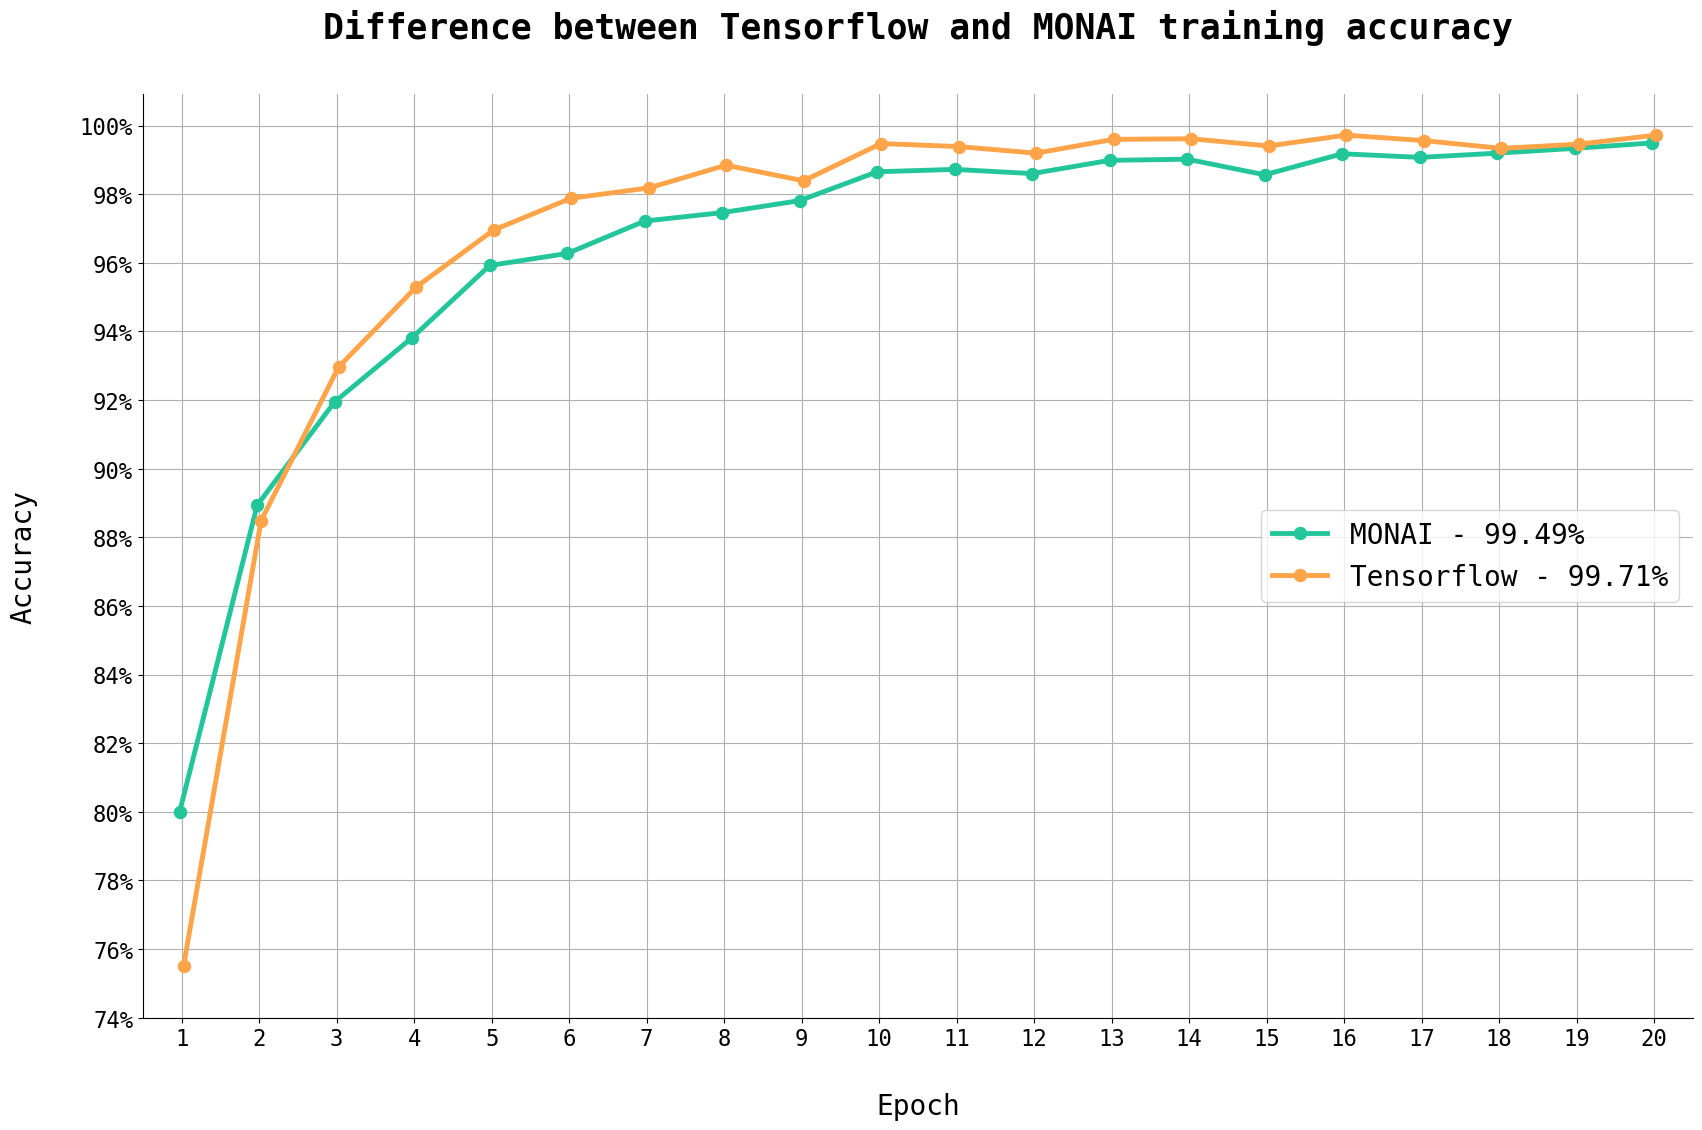

In [6]:
plt.figure(figsize=(20, 12))

plt.rcParams['font.family'] = 'monospace'

palette=["#23c69aff", "#ffa449"]

# Sample DataFrame
data = {
    'Epoch': epoch_nums,
    'MONAI - 99.49%': monai_accuracy,
    'Tensorflow - 99.71%': tensorflow_accuracy
}
df = pd.DataFrame(data)

# Reshape the DataFrame to long format for Seaborn
df_melted = df.melt(id_vars=['Epoch'], value_vars=['MONAI - 99.49%', 'Tensorflow - 99.71%'], 
                     var_name = 'Legend', value_name="Quantity in millions of tons")

# Plot using pointplot
point_plot = sns.pointplot(data=df_melted, x = 'Epoch', y = 'Quantity in millions of tons', hue="Legend", dodge=True, palette = palette, linestyles = ['-', '-'], scale = 1.3)

plt.xlabel('Epoch', fontsize = 20, labelpad = 30)
plt.ylabel('Accuracy', fontsize = 20, labelpad = 30)

plt.title('Difference between Tensorflow and MONAI training accuracy', fontsize = 25, fontweight = 'bold', pad = 40)

yticks = np.arange(74, 101, 2)

plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

point_plot.set_yticks(yticks)  # Set the new y-ticks at the same positions

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'center right', prop = {'size': 20})

plt.grid(True)

sns.despine()

plt.show()

### Plot the last 10 epochs

In [7]:
last_epochs = epoch_nums[9:]
monai_last_accuracy = monai_accuracy[9:]
tensorflow_last_accuracy = tensorflow_accuracy[9:]

/var/folders/xy/51wr98g97xn6sv90wcdyfjf40000gn/T/ipykernel_4975/944076982.py:20: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  point_plot = sns.pointplot(data=df_melted, x = 'Epoch', y = 'accuracy', hue="Legend", dodge=True, palette = palette, linestyles = ['-', '--'], scale = 2.0)


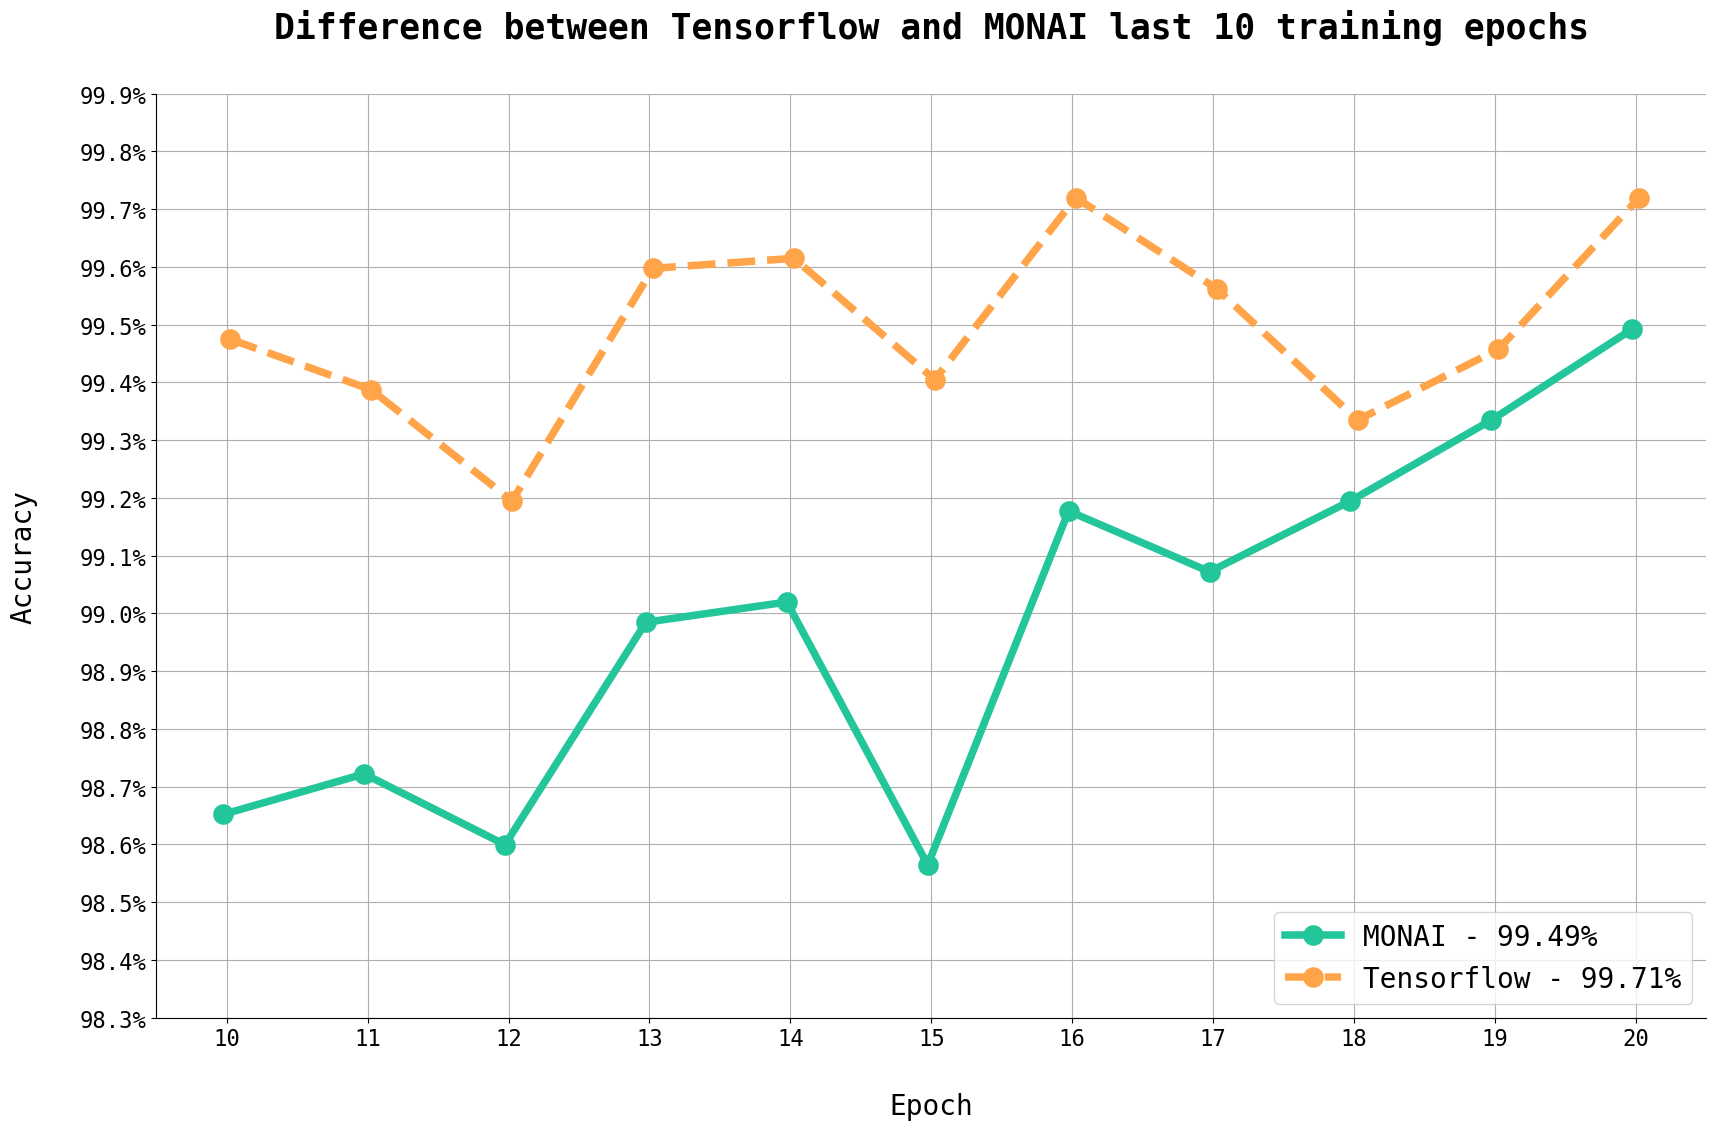

In [8]:
plt.figure(figsize=(20, 12))

plt.rcParams['font.family'] = 'monospace'

palette=["#23c69aff", "#ffa449"]

# Sample DataFrame
data = {
    'Epoch': last_epochs,
    'MONAI - 99.49%': monai_last_accuracy,
    'Tensorflow - 99.71%': tensorflow_last_accuracy
}
df = pd.DataFrame(data)

# Reshape the DataFrame to long format for Seaborn
df_melted = df.melt(id_vars=['Epoch'], value_vars=['MONAI - 99.49%', 'Tensorflow - 99.71%'], 
                     var_name = 'Legend', value_name="accuracy")

# Plot using pointplot
point_plot = sns.pointplot(data=df_melted, x = 'Epoch', y = 'accuracy', hue="Legend", dodge=True, palette = palette, linestyles = ['-', '--'], scale = 2.0)

plt.xlabel('Epoch', fontsize = 20, labelpad = 30)
plt.ylabel('Accuracy', fontsize = 20, labelpad = 30)

plt.title('Difference between Tensorflow and MONAI last 10 training epochs', fontsize = 25, fontweight = 'bold', pad = 40)

yticks = np.arange(98.3, 99.9, 0.1)

# plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals = 1))

point_plot.set_yticks(yticks)  # Set the new y-ticks at the same positions

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'lower right', prop = {'size': 20})

plt.grid(True)

sns.despine()

plt.show()

### Ploting the loss results

In [9]:
epoch_nums = monai_results['Epoch']
monai_loss = monai_results['Loss']
tensorflow_loss = tf_results['loss']

/var/folders/xy/51wr98g97xn6sv90wcdyfjf40000gn/T/ipykernel_4975/1942580137.py:20: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  point_plot = sns.pointplot(data=df_melted, x = 'Epoch', y = 'value_name', hue="Legend", dodge=True, palette = palette, linestyles = ['-', '-'], scale = 1.3)


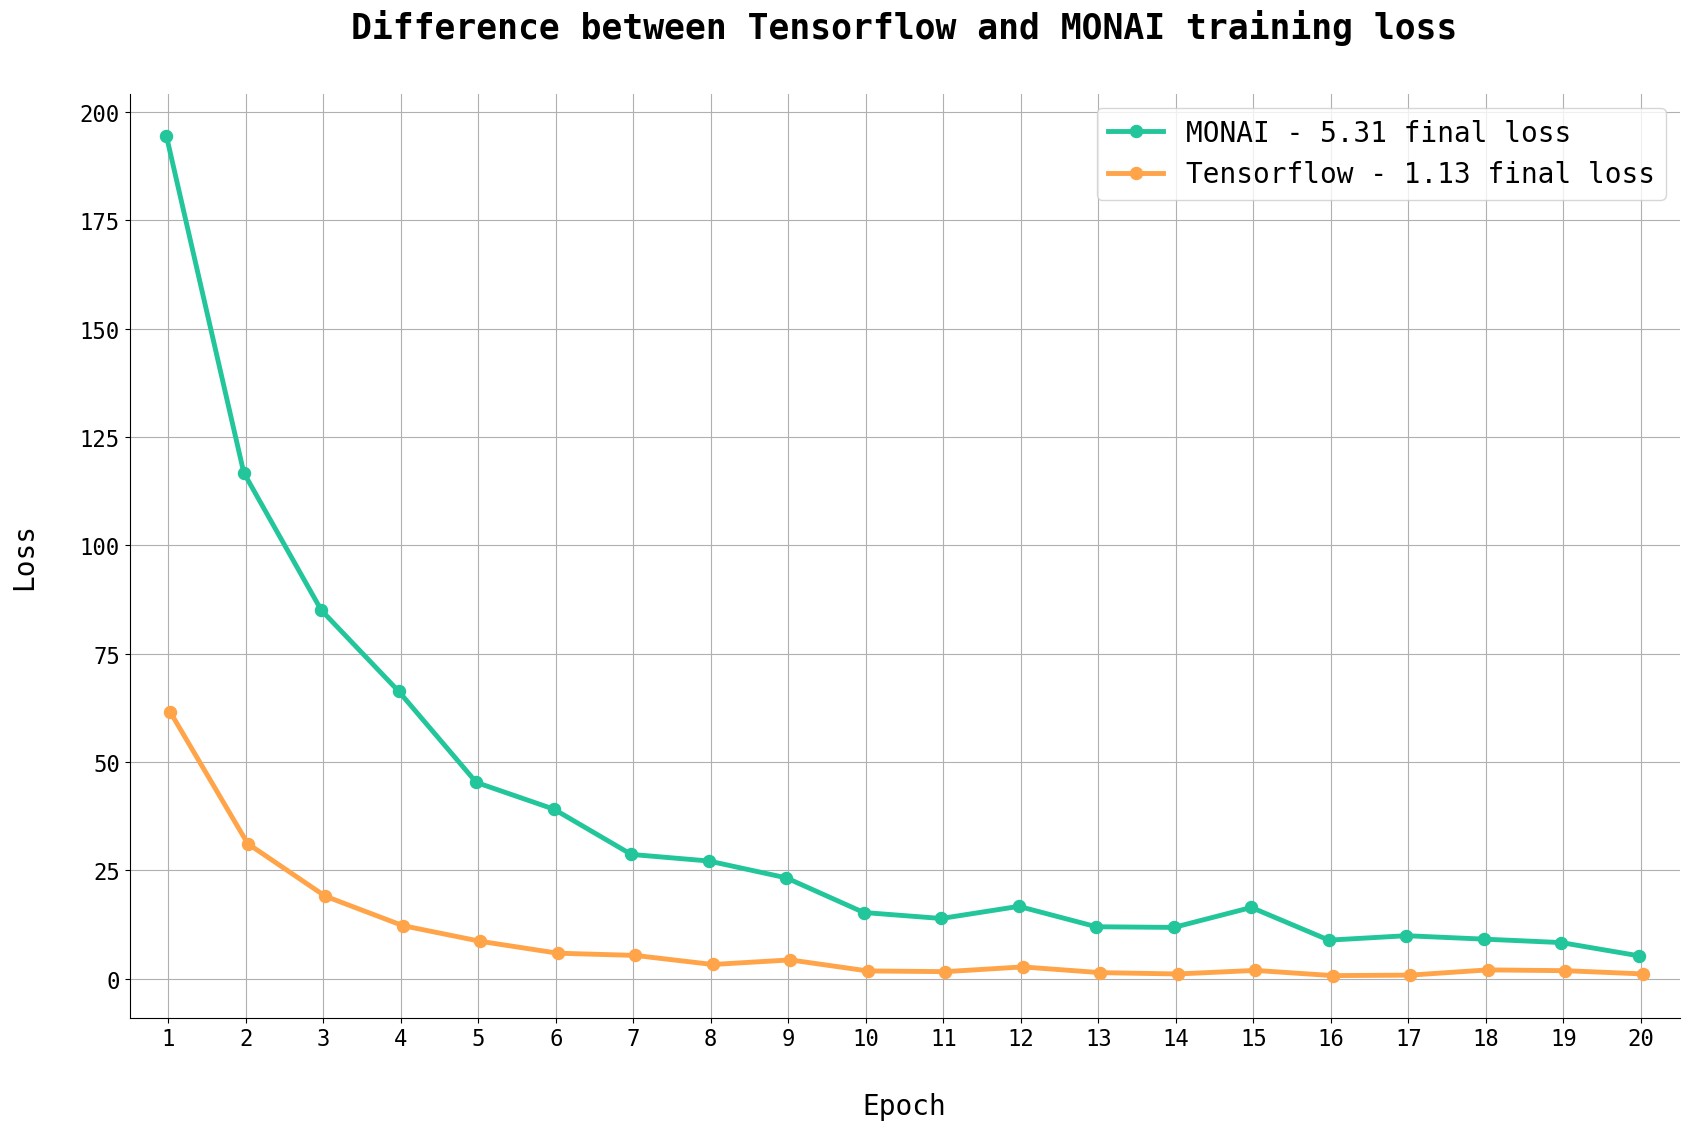

In [10]:
plt.figure(figsize=(20, 12))

plt.rcParams['font.family'] = 'monospace'

palette=["#23c69aff", "#ffa449"]

# Sample DataFrame
data = {
    'Epoch': epoch_nums,
    'MONAI - 5.31 final loss': monai_loss,
    'Tensorflow - 1.13 final loss': tensorflow_loss
}
df = pd.DataFrame(data)

# Reshape the DataFrame to long format for Seaborn
df_melted = df.melt(id_vars=['Epoch'], value_vars=['MONAI - 5.31 final loss', 'Tensorflow - 1.13 final loss'], 
                     var_name = 'Legend', value_name='value_name')

# Plot using pointplot
point_plot = sns.pointplot(data=df_melted, x = 'Epoch', y = 'value_name', hue="Legend", dodge=True, palette = palette, linestyles = ['-', '-'], scale = 1.3)

plt.xlabel('Epoch', fontsize = 20, labelpad = 30)
plt.ylabel('Loss', fontsize = 20, labelpad = 30)

plt.title('Difference between Tensorflow and MONAI training loss', fontsize = 25, fontweight = 'bold', pad = 40)

# yticks = np.arange(74, 101, 2)

# plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# point_plot.set_yticks(yticks)  # Set the new y-ticks at the same positions

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'upper right', prop = {'size': 20})

plt.grid(True)

sns.despine()

plt.show()

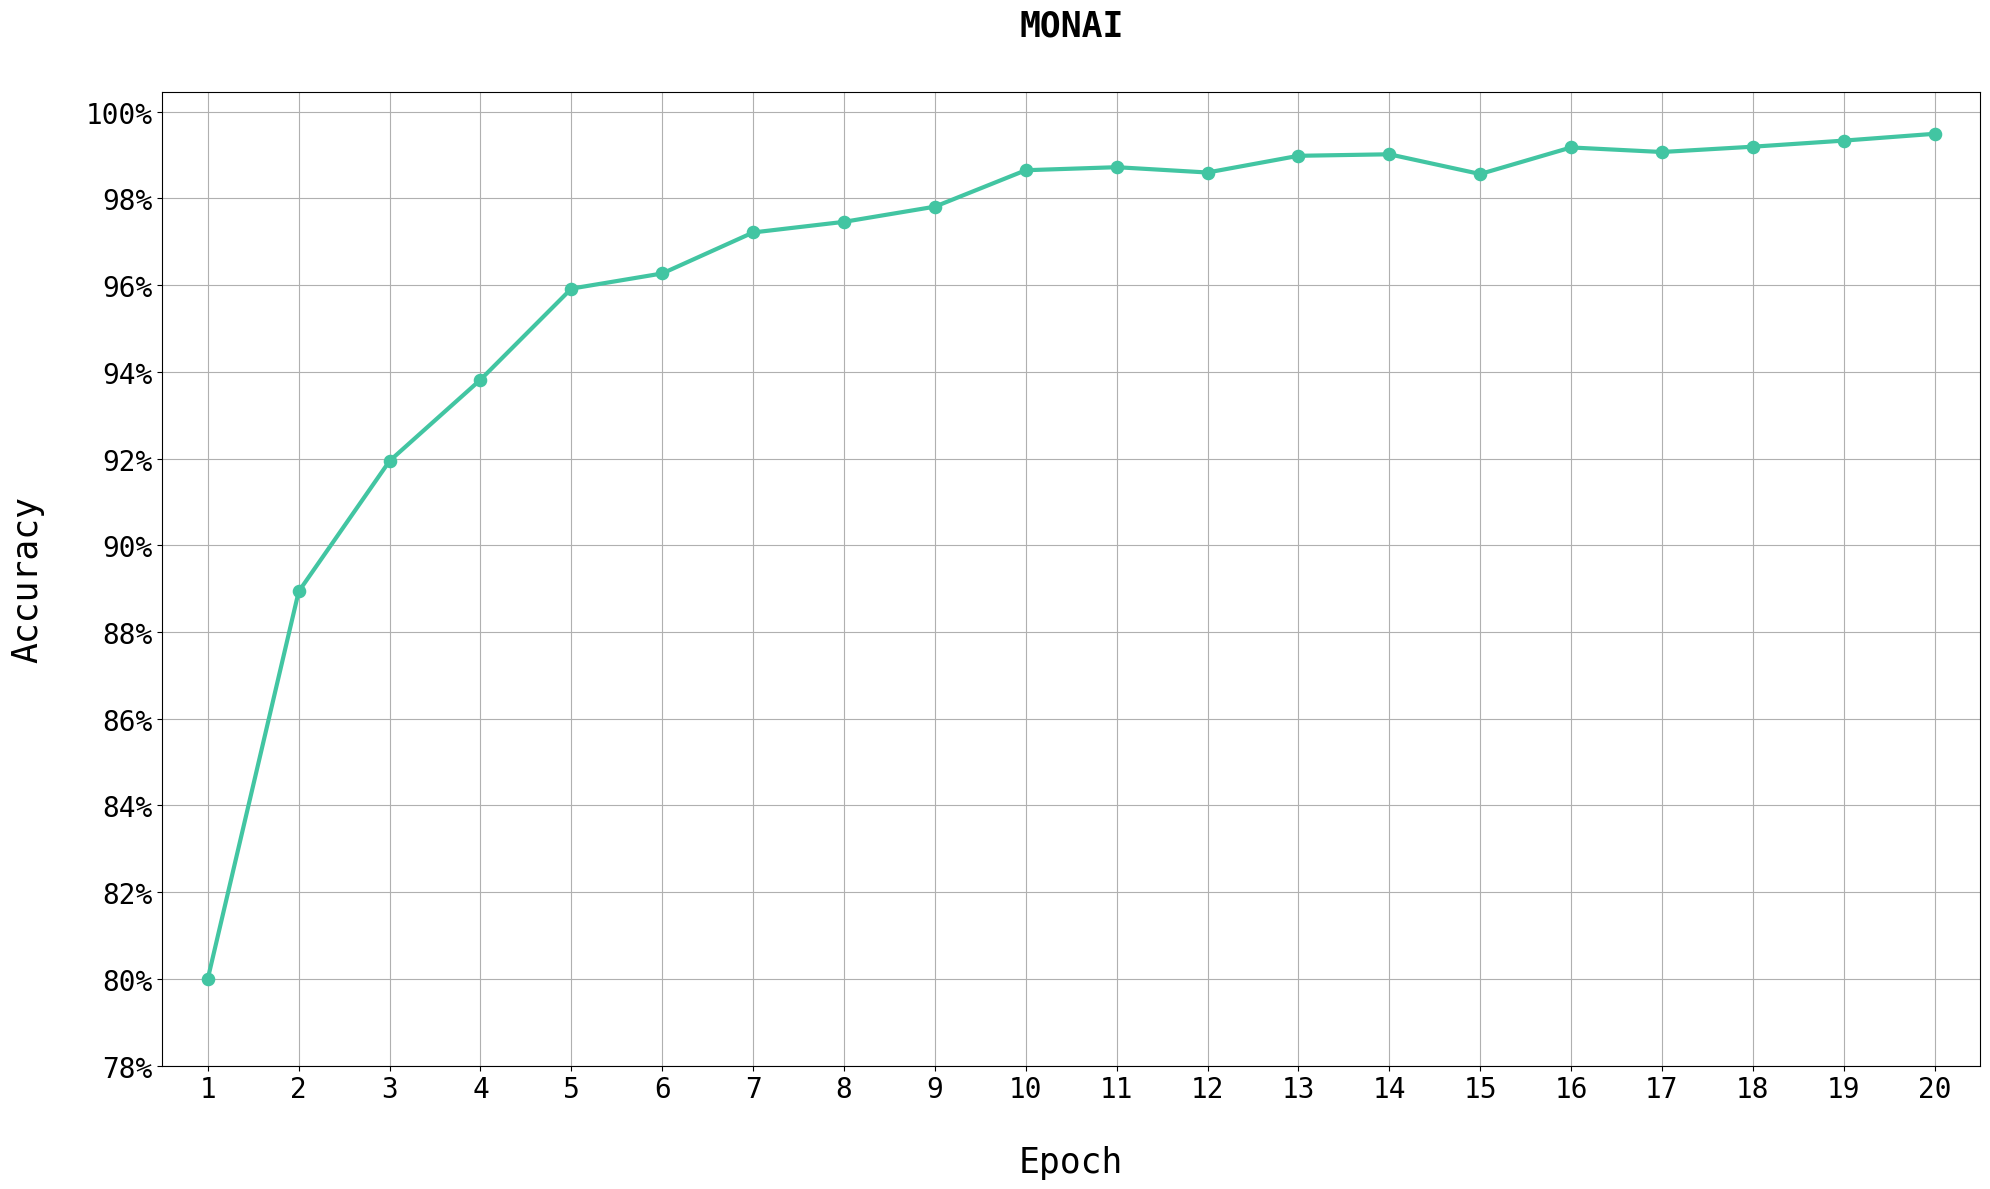

In [11]:
plt.figure(figsize=(20, 12))

point_plot = sns.pointplot(x='Epoch', y='Accuracy', data = monai_results, legend = False, linewidth = 3, color = '#42c5a2')

plt.title('MONAI', fontsize = 25, fontweight = 'bold', pad = 40)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xlabel('Epoch', fontsize = 25, labelpad = 30)
plt.ylabel('Accuracy', fontsize = 25, labelpad = 30)

plt.grid(True)
# plt.legend()

yticks = np.arange(78, 101, 2)

# plt.ylim(78, 100)

plt.xticks(fontsize = 20)
plt.yticks(yticks, fontsize = 20)

plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['font.weight'] = 'bold'

# Add the percentage (%) symbol at the end
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

plt.tight_layout()
plt.show()

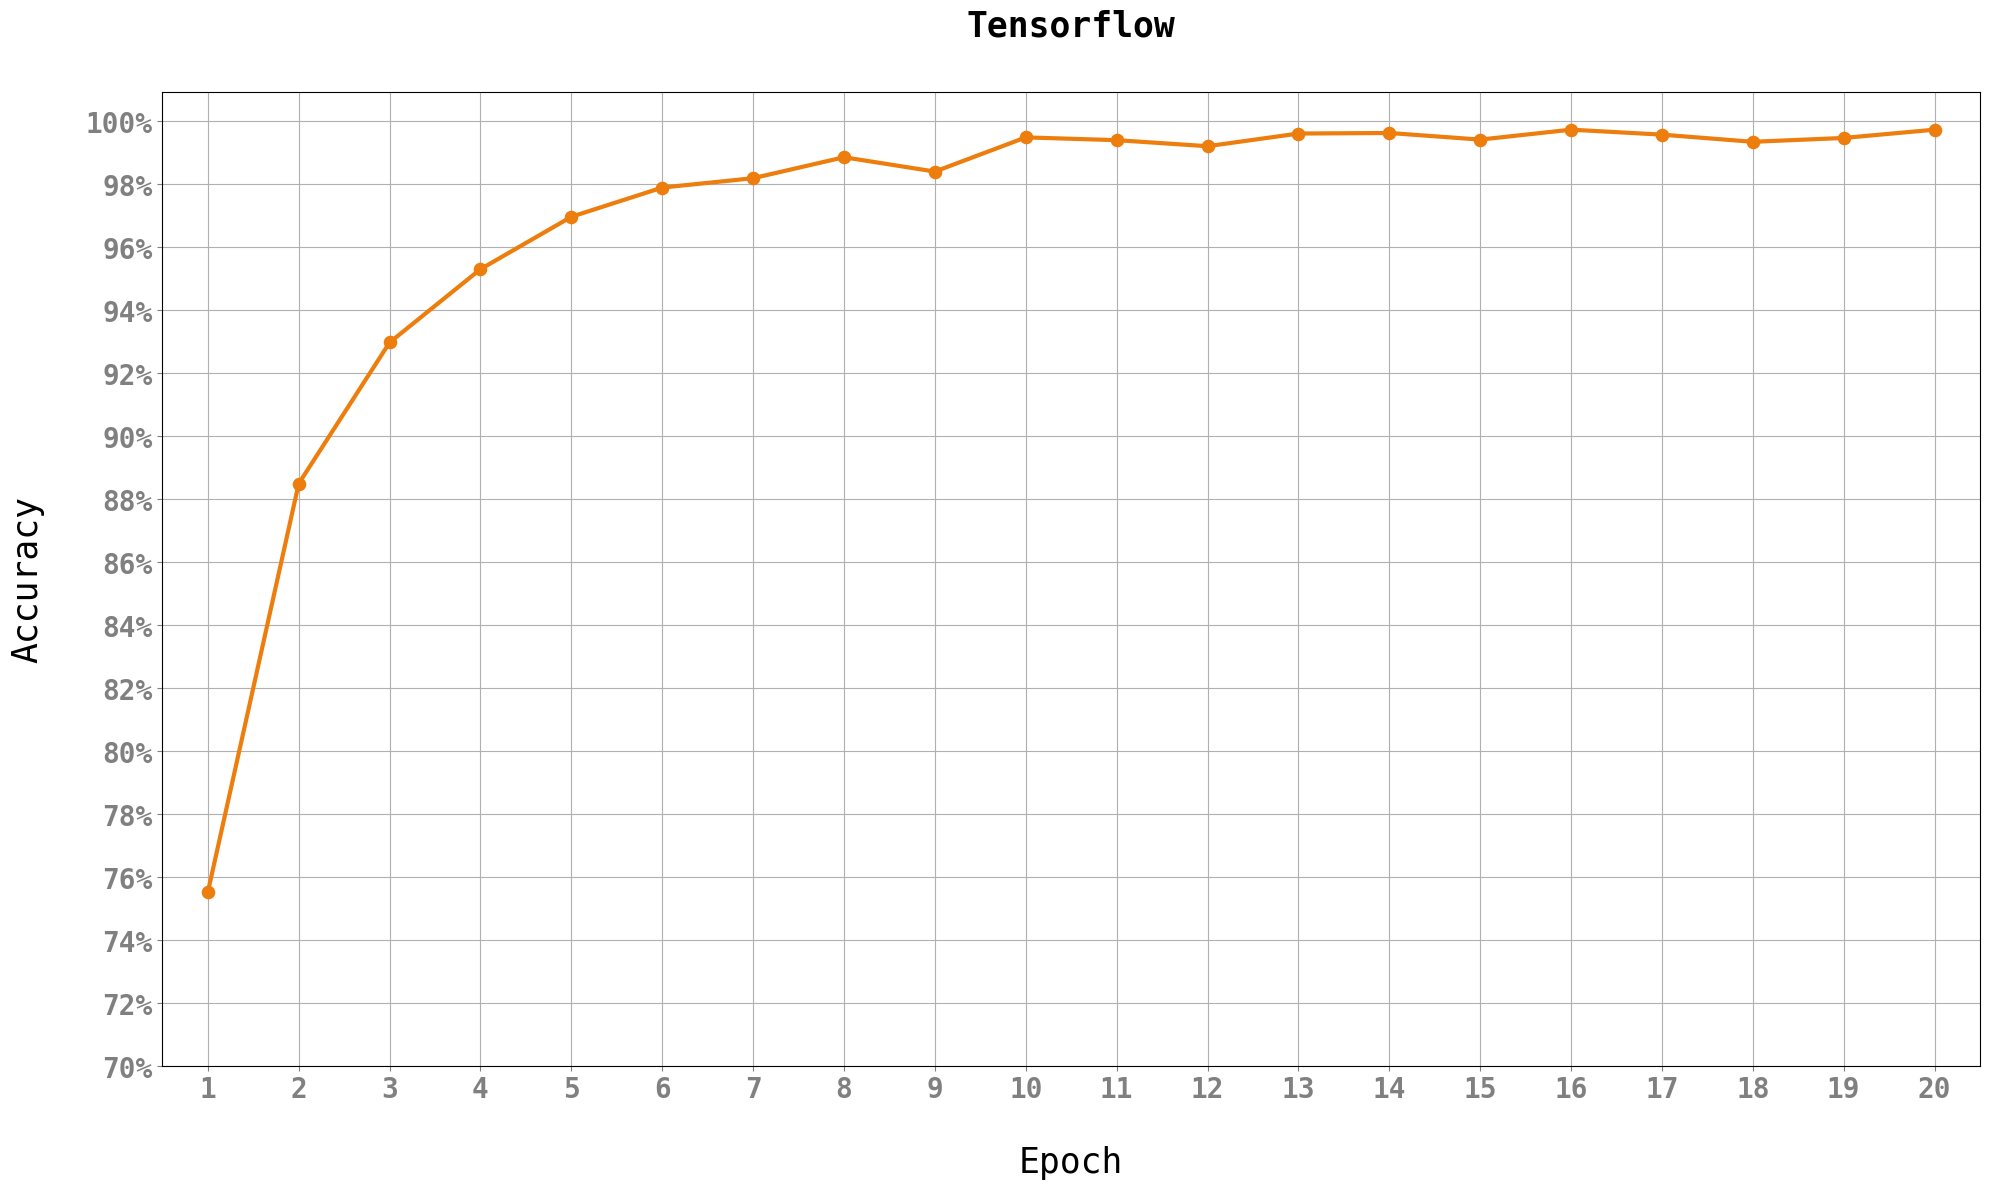

In [12]:
plt.figure(figsize=(20, 12))

point_plot = sns.pointplot(x='epoch', y='accuracy', data = tf_results, legend = False, linewidth = 3, color = "#ed7d0d")

plt.title('Tensorflow', fontsize = 25, fontweight = 'bold', pad = 40)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xlabel('Epoch', fontsize = 25, labelpad = 30)
plt.ylabel('Accuracy', fontsize = 25, labelpad = 30)

plt.grid(True)
# plt.legend()

yticks = np.arange(70, 101, 2)

# plt.ylim(78, 100)

plt.xticks(fontsize = 20)
plt.yticks(yticks, fontsize = 20)

plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['font.weight'] = 'bold'

# Add the percentage (%) symbol at the end
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

plt.tight_layout()
plt.show()